<a href="https://colab.research.google.com/github/starkjones/NYC-CONDOMINIUM-COMPARABLE-RENTAL-INCOME-ANALYSIS/blob/main/NYC_Condo_Comp_RI__Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **NYC CONDOMINIUM COMPARABLE RENTAL INCOME ANALYSIS**

Jonathan Jones

22.05.05

In [1]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **PRIMARY DATASET**

1) Source of data:

  https://data.cityofnewyork.us/Housing-Development/DOF-Condominium-Comparable-Rental-Income-Manhattan/ad4c-mphb

2) Brief description of data

 NYC Condominiums with similar features are compared and assessed as rental units. 

3) What is the target?

  Manhattan Condominimum Est. Gross Income

4) Is this a classification or regression problem?

  This is regression problem as the target value is not limited to a finite number of classes or values. 

5) How many features?

  46-1(target) columns = 45 features (TBD). I will undoubtedly drop several more columns once I begin to look through the data more closely.  

6) How many rows of data.

  1068

7) What, if any, challenges do you foresee in cleaning, exploring, or modeling with this dataset?

 This dataset has a lot of columns, the challenge lies in determining which columns will be the most effective for predicting our target values. 

In [2]:
data = '/content/drive/MyDrive/SI/DOF__Condominium_Comparable_Rental_Income___Manhattan___FY_2009_2010_ML.xlsx'
df = pd.read_excel(data)
df.head(5)

,MANHATTAN CONDOMINIUM PROPERTY Boro-Block-Lot,MANHATTAN CONDOMINIUM PROPERTY Condo Section,MANHATTAN CONDOMINIUM PROPERTY Address,Borough,Postcode,Latitude,Longitude,Community Board,Council District,Census Tract,...,COMPARABLE RENTAL 2 Neighborhood,COMPARABLE RENTAL 2 Building Classification,COMPARABLE RENTAL 2 Total Units,COMPARABLE RENTAL 2 Year Built,COMPARABLE RENTAL 2 Gross SqFt,COMPARABLE RENTAL 2 Est. Gross Income,COMPARABLE RENTAL 2 Gross Income per SqFt,COMPARABLE RENTAL 2 Full Market Value,COMPARABLE RENTAL 2 Market Value per SqFt,COMPARABLE RENTAL 2 Dist. from Coop in miles
0,1-00007-7501,735-R1,1 COENTIES SLIP,1,10004.0,40.703627,-74.010607,1.0,1.0,9.0,...,SOUTHBRIDGE,C7-WALK-UP,12.0,1900.0,17475.0,732000.0,41.9,3670000.0,210.0,0.55
1,1-00015-7502,1557-R1,20 WEST STREET,1,10004.0,40.706358,-74.016151,1.0,1.0,13.0,...,FINANCIAL,D8-ELEVATOR,650.0,2003.0,627330.0,25002565.0,39.9,125000000.0,199.0,0.50
2,1-00016-7501,308-R1,377 RECTOR PLACE,1,10280.0,40.709506,-74.018002,1.0,1.0,31704.0,...,TRIBECA,D8-ELEVATOR,341.0,1998.0,357000.0,13358015.0,37.4,67000000.0,188.0,0.00
3,1-00016-7502,313-R1,320 ALBANY STREET,1,10280.0,40.710165,-74.016751,1.0,1.0,31704.0,...,TRIBECA,D8-ELEVATOR,341.0,1998.0,357000.0,13358015.0,37.4,67000000.0,188.0,0.00
4,1-00016-7503,385-R1,250 SOUTH END AVENUE,1,10280.0,40.709709,-74.016560,1.0,1.0,31704.0,...,TRIBECA,D8-ELEVATOR,341.0,1998.0,357000.0,13358015.0,37.4,67000000.0,188.0,0.00


## **PRIMARY DATASET**

In [3]:
# Shape of data frame:

df.shape

# 1068 rows 
# 46 columns

(1068, 46)

In [4]:
# # Unadulterated copy for Machine Learning:

df_ML = df.copy()

In [5]:
# Changing all column names to lowercase:

df.columns = df.columns.str.lower()

In [6]:
# Preliminary check of column names, datatypes and entry quantities:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 46 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   manhattan condominium property boro-block-lot           1068 non-null   object 
 1   manhattan condominium property condo section            1068 non-null   object 
 2   manhattan condominium property address                  1068 non-null   object 
 3   borough                                                 1068 non-null   int64  
 4   postcode                                                1053 non-null   float64
 5   latitude                                                1053 non-null   float64
 6   longitude                                               1053 non-null   float64
 7   community board                                         1053 non-null   float64
 8   council district                      

##**DATA CLEANING & PREPARATION**

In [7]:
# Check for duplciated rows:

df.duplicated().sum()

0

In [8]:
df.nunique()

manhattan condominium property boro-block-lot             1056
manhattan condominium property condo section              1068
manhattan condominium property address                    1062
borough                                                      1
postcode                                                    44
latitude                                                  1039
longitude                                                 1040
community board                                             13
council district                                            10
census tract                                               203
bin                                                       1039
bbl                                                       1037
nta                                                         28
manhattan condominium property neighborhood                 38
manhattan condominium property building classification       4
manhattan condominium property total units             

In [9]:
# Removal of ineffectual columns:
remove = {'borough','manhattan condominium property boro-block-lot', 
          'comparable rental 2  boro-block-lot','bin', 'bbl',
          'manhattan condominium property condo section', 
          'census tract', ' comparable rental 1 boro-block-lot', 'postcode', 'community board'}
df.drop(columns = remove, inplace = True)

In [10]:
# Check for missing values:

df.isna().sum()

manhattan condominium property address                     0
latitude                                                  15
longitude                                                 15
council district                                          15
nta                                                       15
manhattan condominium property neighborhood                0
manhattan condominium property building classification     0
manhattan condominium property total units                 0
manhattan condominium property year built                  0
manhattan condominium property gross sqft                  0
manhattan condominium property est. gross income           0
manhattan condominium property gross income per sqft       0
manhattan condominium property full market value           0
manhattan condominium property market value per sqft       0
comparable rental 1 address                                0
comparable rental 1  neighborhood                          0
comparable rental 1  bui

Imputation Strategy: 
  

missing 15 / 1068 or 01.40 % of entries
missing 23 / 1068 or 02.15 % of entries

postcode                                                  15
latitude                                                  15
longitude                                                 15
community board                                           15
council district                                          15
census tract                                              15
bin                                                       23
bbl                                                       23
nta                                                       15

reviews per month: missing 57 / 1068 or 05.33 % of its entries

comparable rental 2  boro-block-lot                       57
comparable rental 2  address                              57
comparable rental 2  neighborhood                         57
comparable rental 2  building classification              57
comparable rental 2  total units                          57
comparable rental 2  year built                           57
comparable rental 2  gross sqft                           57
comparable rental 2  est. gross income                    57
comparable rental 2  gross income per sqft                57
comparable rental 2  full market value                    57
comparable rental 2  market value per sqft                57
comparable rental 2  dist. from coop in miles             57


In [11]:
# import re

# column = df['comparable rental 2  gross sqft']

# for i in column:
#   if i == int:
#     'ignore'
#   else:
#     i.replace({',':'', "'":""}, regex = True)
#     # re.sub(pattern = '\w', repl = '', string = i)



In [12]:
# Fill Values and Lists:
lon = df['longitude'].mean()
lat = df['latitude'].mean()
cd = round(df['council district'].mean(), 1)

cr2_tu = df['comparable rental 2  total units'].mean()
cr2_yb = df['comparable rental 2  year built'].values[1]
cr2_gs = df['comparable rental 2  gross sqft'].mean()
cr2_egi = df['comparable rental 2  est. gross income'].mean()
cr2_gipsf = df['comparable rental 2  gross income per sqft'].mean()
cr2_fmv = df['comparable rental 2  full market value'].mean()
cr2_mvpsf = df['comparable rental 2  market value per sqft'].mean()
cr2_drc = df['comparable rental 2  dist. from coop in miles'].mean()

# Object Imputation:
df['nta'].fillna('Missing', inplace =True)
df['comparable rental 2  address'].fillna('Missing', inplace =True)
df['comparable rental 2  neighborhood'].fillna('Missing', inplace =True)
df['comparable rental 2  building classification'].fillna('Missing', inplace =True)

# Numeric Imputation:
df['latitude'].fillna(lat, inplace =True)
df['longitude'].fillna(lon, inplace =True)
df['council district'].fillna(cd, inplace =True)

df['comparable rental 2  total units'].fillna(cr2_tu, inplace =True)
df['comparable rental 2  year built'].fillna(cr2_yb, inplace =True)
df['comparable rental 2  gross sqft'].fillna(cr2_gs, inplace =True)
df['comparable rental 2  est. gross income'].fillna(cr2_egi, inplace =True)
df['comparable rental 2  gross income per sqft'].fillna(cr2_gipsf, inplace =True)
df['comparable rental 2  full market value'].fillna(cr2_fmv, inplace =True)
df['comparable rental 2  market value per sqft'].fillna(cr2_mvpsf, inplace =True)
df['comparable rental 2  dist. from coop in miles'].fillna(cr2_drc, inplace =True)


# comparable rental 2  address                              57
# comparable rental 2  neighborhood                         57
# comparable rental 2  building classification              57
# comparable rental 2  total units                          57
# comparable rental 2  year built                           57
# comparable rental 2  gross sqft                           57
# comparable rental 2  est. gross income                    57
# comparable rental 2  gross income per sqft                57
# comparable rental 2  full market value                    57
# comparable rental 2  market value per sqft                57
# comparable rental 2  dist. from coop in miles             57

In [13]:
# Datatype correction:

df['manhattan condominium property gross income per sqft'] = df['manhattan condominium property gross income per sqft'].astype(int)
df['manhattan condominium property market value per sqft'] = df['manhattan condominium property market value per sqft'].astype(int)
df['comparable rental 1  gross income per sqft'] = df['comparable rental 1  gross income per sqft'].astype(int)
df['comparable rental 1  market value per sqft'] = df['comparable rental 1  market value per sqft'].astype(int)
df['comparable rental 1  dist. from coop in miles'] = df['comparable rental 1  dist. from coop in miles'].astype(int)
df['comparable rental 2  total units'] = df['comparable rental 2  total units'].astype(int)
df['council district'] = df['council district'].astype(int)
df['comparable rental 2  year built'] = df['comparable rental 2  year built'].astype(int)
df['comparable rental 2  gross sqft'] = df['comparable rental 2  gross sqft'].astype(int)
df['comparable rental 2  est. gross income'] = df['comparable rental 2  est. gross income'].astype(int)
df['comparable rental 2  gross income per sqft'] = df['comparable rental 2  full market value'].astype(int)
df['comparable rental 2  full market value'] = df['comparable rental 2  full market value'].astype(int)
df['comparable rental 2  market value per sqft'] = df['comparable rental 2  market value per sqft'].astype(int)
df['comparable rental 2  dist. from coop in miles'] = df['comparable rental 2  dist. from coop in miles'].astype(int)

In [14]:
# Final check for missing values:

df.isna().sum()

manhattan condominium property address                    0
latitude                                                  0
longitude                                                 0
council district                                          0
nta                                                       0
manhattan condominium property neighborhood               0
manhattan condominium property building classification    0
manhattan condominium property total units                0
manhattan condominium property year built                 0
manhattan condominium property gross sqft                 0
manhattan condominium property est. gross income          0
manhattan condominium property gross income per sqft      0
manhattan condominium property full market value          0
manhattan condominium property market value per sqft      0
comparable rental 1 address                               0
comparable rental 1  neighborhood                         0
comparable rental 1  building classifica

In [15]:
# Checking value names in object columns for inconsistencies:

datatypes = df.dtypes
object_cols = datatypes[datatypes =='object'].index
object_cols

for column in object_cols:
  print(f'Column Name = {column}')
  print('\n')
  print(df[column].value_counts(dropna=False))
  print('\n\n')

Column Name = manhattan condominium property address


2 AMSTERDAM AVENUE       2
352 CATHEDRAL PARKWAY    2
1049 5 AVENUE            2
450 WEST 17 STREET       2
301 WEST 57 STREET       2
                        ..
210 WEST 19 STREET       1
140 7 AVENUE             1
270 WEST 19 STREET       1
160 7 AVENUE             1
571 ACADEMY STREET       1
Name: manhattan condominium property address, Length: 1062, dtype: int64



Column Name = nta


SoHo-TriBeCa-Civic Center-Little Italy                                         109
Hudson Yards-Chelsea-Flatiron-Union Square                                      99
Upper West Side                                                                 95
West Village                                                                    88
Upper East Side-Carnegie Hill                                                   88
Turtle Bay-East Midtown                                                         62
Lincoln Square                                        

In [16]:
# Check for insconsistencies and odd numeric entries:

df.describe().round(1)

,latitude,longitude,council district,manhattan condominium property total units,manhattan condominium property year built,manhattan condominium property gross sqft,manhattan condominium property est. gross income,manhattan condominium property gross income per sqft,manhattan condominium property full market value,manhattan condominium property market value per sqft,...,comparable rental 1 market value per sqft,comparable rental 1 dist. from coop in miles,comparable rental 2 total units,comparable rental 2 year built,comparable rental 2 gross sqft,comparable rental 2 est. gross income,comparable rental 2 gross income per sqft,comparable rental 2 full market value,comparable rental 2 market value per sqft,comparable rental 2 dist. from coop in miles
count,1068.0,1068.0,1068.0,1068.0,1068.0,1068.0,1068.0,1068.0,1068.0,1068.0,...,1068.0,1068.0,1068.0,1068.0,1068.0,1068.0,1068.0,1068.0,1068.0,1068.0
mean,40.8,-74.0,3.9,95.4,1936.4,116266.6,4203889.4,33.8,20499389.0,164.3,...,178.8,0.1,123.3,1954.6,123971.1,4746962.7,23264705.2,23264705.2,178.8,0.2
std,0.0,0.0,2.2,120.4,182.7,137912.9,5453632.0,7.6,27059983.0,42.3,...,53.2,0.4,124.6,37.9,138310.2,5545595.9,27442762.7,27442762.7,53.7,0.5
min,40.7,-74.0,1.0,11.0,0.0,3812.0,0.0,0.0,543000.0,5.0,...,27.0,0.0,11.0,1880.0,2064.0,53209.0,231000.0,231000.0,28.0,0.0
25%,40.7,-74.0,2.0,24.0,1915.0,32394.5,959733.0,29.0,4540000.2,138.0,...,147.0,0.0,39.0,1920.0,33638.0,1103234.0,5170000.0,5170000.0,149.0,0.0
50%,40.8,-74.0,4.0,50.0,1956.0,67919.0,2259900.0,34.0,10949993.5,163.0,...,185.0,0.0,87.0,1962.0,78646.0,2664906.0,12900000.0,12900000.0,185.0,0.0
75%,40.8,-74.0,5.0,121.0,1988.0,145073.8,4958916.2,39.0,23965003.8,195.2,...,218.0,0.0,146.2,1991.0,147773.0,5876391.0,29500000.0,29500000.0,213.0,0.0
max,40.9,-73.9,10.0,1258.0,2008.0,1496819.0,54630000.0,65.0,274000010.0,328.0,...,381.0,4.0,1112.0,2005.0,1588533.0,34627255.0,174000000.0,174000000.0,391.0,4.0


##**VISUAL ANALYSIS**

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation map to ascertain related features:

correlation = df.corr().round(2)
c_list = correlation.unstack().sort_values(ascending = False)

# for i in enumerate(c_list):
#   if i == 1.00:
#     'ignore'
#   else:
#     i == 1
#     print(i, column, column)
#     print('\n')

c_list.head(40)

latitude                                              latitude                                                1.00
council district                                      council district                                        1.00
manhattan condominium property year built             manhattan condominium property year built               1.00
manhattan condominium property gross sqft             manhattan condominium property gross sqft               1.00
manhattan condominium property est. gross income      manhattan condominium property est. gross income        1.00
                                                      manhattan condominium property full market value        1.00
manhattan condominium property gross income per sqft  manhattan condominium property gross income per sqft    1.00
manhattan condominium property full market value      manhattan condominium property est. gross income        1.00
                                                      manhattan condominium prop

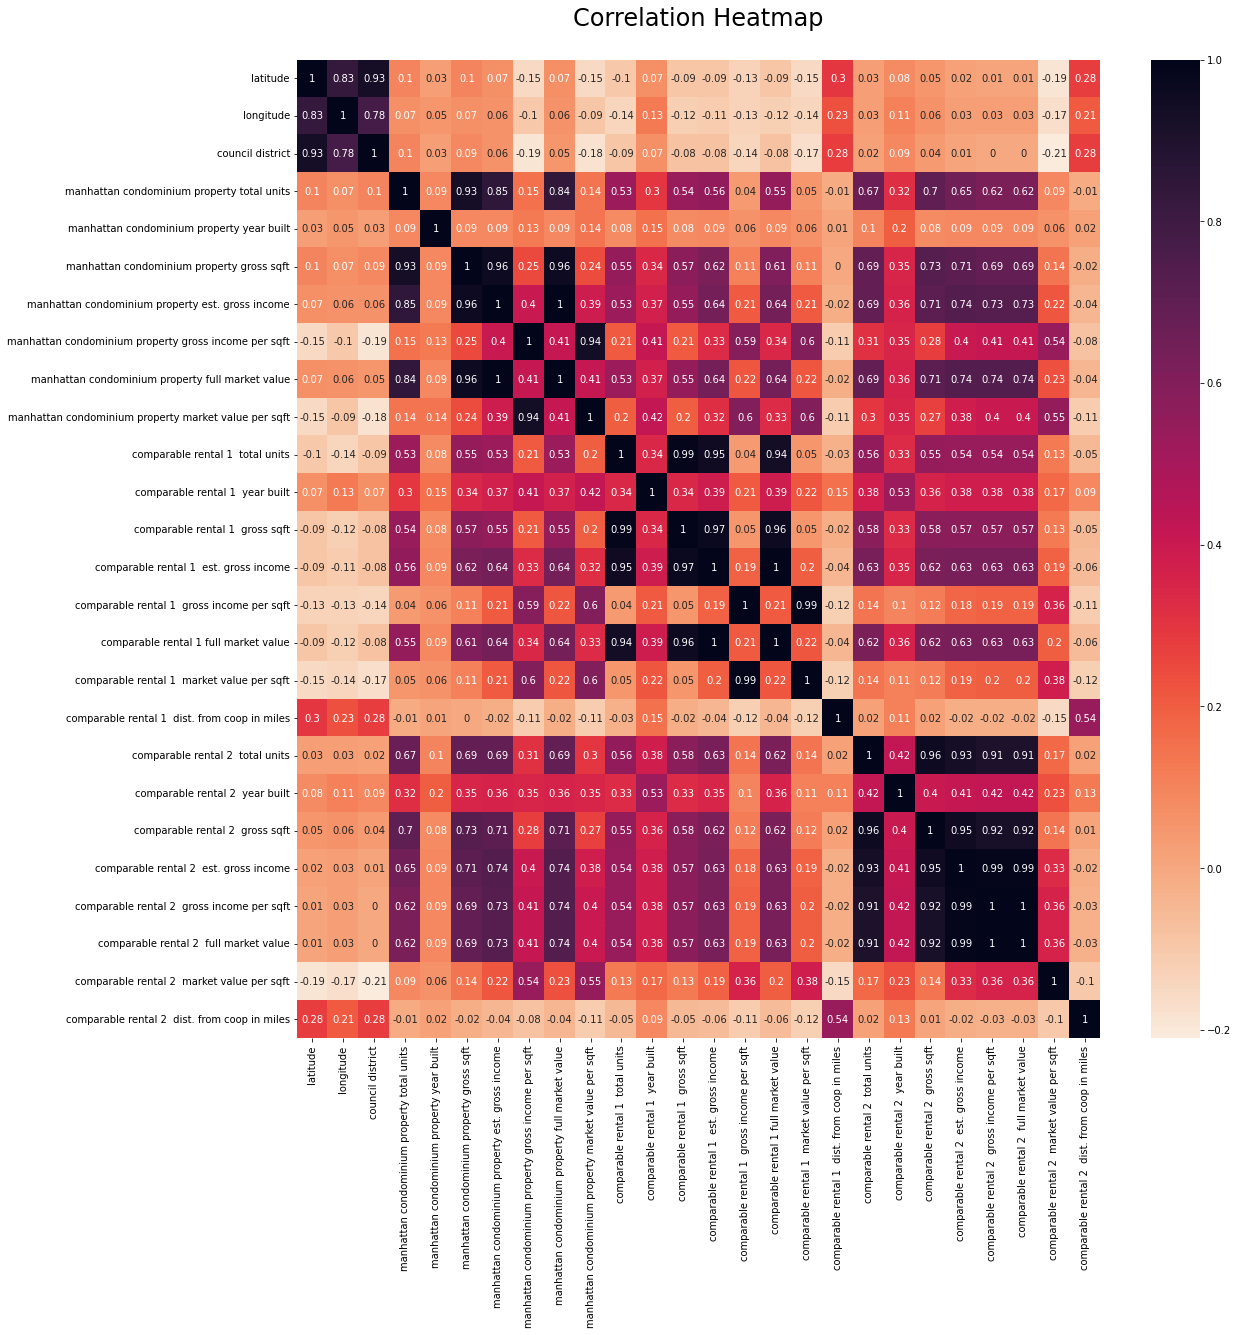

In [18]:
fig, hm = plt.subplots(nrows=1, ncols =1, figsize=(18,18));
hm = sns.heatmap(correlation, cmap='rocket_r', annot=True);
hm.set_title('Correlation Heatmap\n', fontsize= 24);

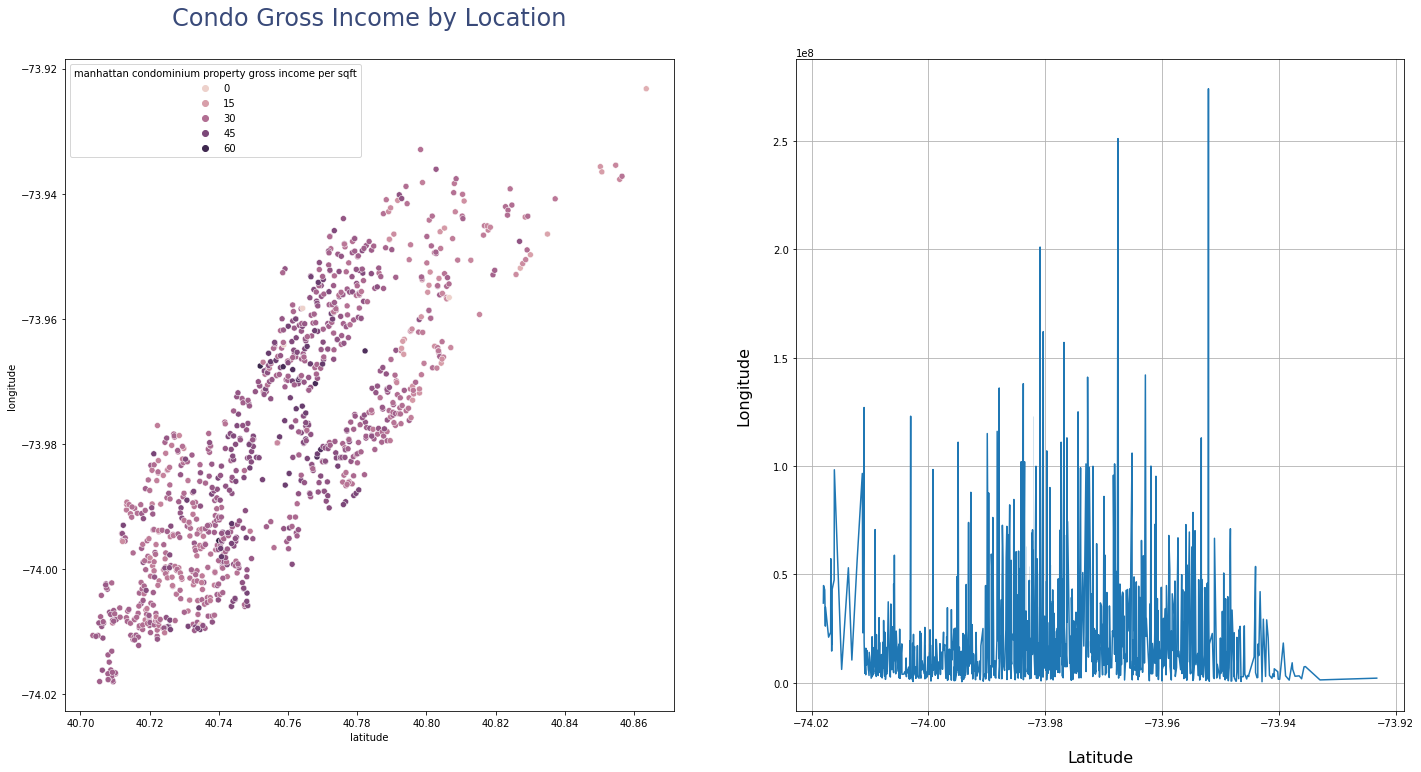

In [19]:
fig, axes = plt.subplots(nrows=1, ncols =2, figsize=(24,12));
lat_lon = sns.scatterplot(data =df,x='latitude', y= 'longitude', hue = 'manhattan condominium property gross income per sqft', ax =axes[0]);
lat_lon.set_title('Condo Gross Income by Location\n', color= '#081d58', alpha= .8, fontsize =24);
plt.xlabel('\nLatitude', fontsize = 16);
plt.ylabel('Longitude\n', fontsize = 16);
plt.grid('both')

lat = sns.lineplot(data =df, x='longitude', y= 'manhattan condominium property full market value', ax = axes[1])

In [20]:
import plotly.express as px

px.scatter_mapbox(df, lat='latitude',lon='longitude',color='manhattan condominium property market value per sqft',
                  mapbox_style="open-street-map")


## Analysis:

A color coded map makes distinctions between areas clear and easy to interpret. The highest market values (represented by warming purple to yellow hues) are concentrated towards the center of the island between mid thirty streets and the mid sixties. Prices appear to decrease linearly as we move further north, away from Central Park's northern bound; Central Park North.

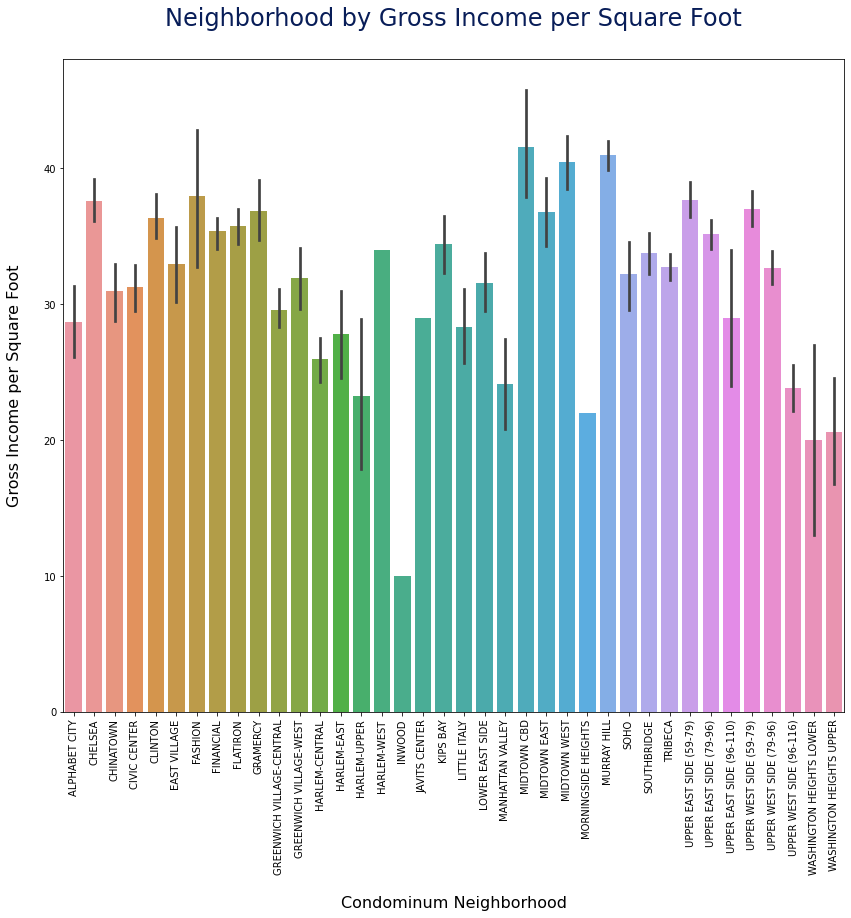

In [21]:
fig, axes = plt.subplots(nrows=1, ncols =1, figsize=(14,12));
neighbors = df['manhattan condominium property neighborhood'].sort_values(ascending =True)
condoloc = sns.barplot(data =df, x= neighbors, y= 'manhattan condominium property gross income per sqft');
plt.title('Neighborhood by Gross Income per Square Foot\n', color= '#081d58', fontsize =24)
plt.xlabel('\nCondominum Neighborhood', fontsize = 16)
plt.ylabel('Gross Income per Square Foot\n', fontsize =16)
plt.xticks(rotation= '90');

## Analysis:

The graph above provides a summary of the most and least expensive neighborghoods on the island of Manhattan. We can see that the Midown Central Business District (CBD) is the most expensive and Inwood at the northern most point of the island is the least expensive. 

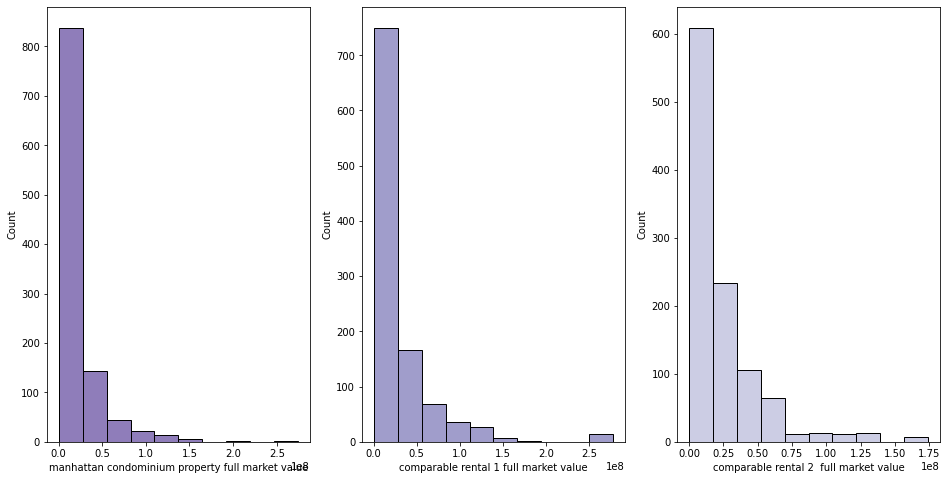

In [22]:

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,8))
sns.histplot(df['manhattan condominium property full market value'],ax=axes[0], 
             bins=10, color="#6a51a3", 
             legend=True, linestyle='solid', 
             line_kws={'lw': 2, 'color': 'black'});
sns.histplot(df['comparable rental 1 full market value'], ax=axes[1],
             bins=10, color="#807dba", 
             legend=True, linestyle='solid', 
             line_kws={'lw': 2, 'color': 'black'});
sns.histplot(df['comparable rental 2  full market value'], ax=axes[2],
             bins=10, color="#bcbddc", 
             legend=True, linestyle='solid', 
             line_kws={'lw': 2, 'color': 'black'});

##**MACHINE LEARNING**

In [23]:
# Preliminary check of the unadulterated dataframe copy:

df_ML.columns = df_ML.columns.str.lower()

df_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 46 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   manhattan condominium property boro-block-lot           1068 non-null   object 
 1   manhattan condominium property condo section            1068 non-null   object 
 2   manhattan condominium property address                  1068 non-null   object 
 3   borough                                                 1068 non-null   int64  
 4   postcode                                                1053 non-null   float64
 5   latitude                                                1053 non-null   float64
 6   longitude                                               1053 non-null   float64
 7   community board                                         1053 non-null   float64
 8   council district                      

In [24]:
df_ML.duplicated().sum()

0

In [25]:
# Datatype correction:

df_ML['manhattan condominium property gross income per sqft'] = df_ML['manhattan condominium property gross income per sqft'].astype(int)
df_ML['manhattan condominium property market value per sqft'] = df_ML['manhattan condominium property market value per sqft'].astype(int)
df_ML['comparable rental 1  gross income per sqft'] = df_ML['comparable rental 1  gross income per sqft'].astype(int)
df_ML['comparable rental 1  market value per sqft'] = df_ML['comparable rental 1  market value per sqft'].astype(int)
df_ML['comparable rental 1  dist. from coop in miles'] = df_ML['comparable rental 1  dist. from coop in miles'].astype(int)
# df_ML['comparable rental 2  total units'] = df_ML['comparable rental 2  total units'].astype(int)
# df_ML['council district'] = df_ML['council district'].astype(int)
# df_ML['comparable rental 2  year built'] = df_ML['comparable rental 2  year built'].astype(int)
# df_ML['comparable rental 2  gross sqft'] = df_ML['comparable rental 2  gross sqft'].astype(int)
# df_ML['comparable rental 2  est. gross income'] = df_ML['comparable rental 2  est. gross income'].astype(int)
# df_ML['comparable rental 2  gross income per sqft'] = df_ML['comparable rental 2  full market value'].astype(int)
# df_ML['comparable rental 2  full market value'] = df_ML['comparable rental 2  full market value'].astype(int)
# df_ML['comparable rental 2  market value per sqft'] = df_ML['comparable rental 2  market value per sqft'].astype(int)
# df_ML['comparable rental 2  dist. from coop in miles'] = df_ML['comparable rental 2  dist. from coop in miles'].astype(int)

In [26]:
# Removal of ineffectual columns:
remove = {'borough','manhattan condominium property boro-block-lot', 
          'comparable rental 2  boro-block-lot','bin', 'bbl',
          'manhattan condominium property condo section', 
          'census tract', ' comparable rental 1 boro-block-lot', 'postcode', 'community board'}
df_ML.drop(columns = remove, inplace = True)

In [27]:
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 36 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   manhattan condominium property address                  1068 non-null   object 
 1   latitude                                                1053 non-null   float64
 2   longitude                                               1053 non-null   float64
 3   council district                                        1053 non-null   float64
 4   nta                                                     1053 non-null   object 
 5   manhattan condominium property neighborhood             1068 non-null   object 
 6   manhattan condominium property building classification  1068 non-null   object 
 7   manhattan condominium property total units              1068 non-null   int64  
 8   manhattan condominium property year bu

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')

# Validation Split 

X = df_ML.drop(columns='manhattan condominium property est. gross income')
y = df_ML['manhattan condominium property est. gross income']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [29]:
from pandas.core.arrays.sparse import dtype
# Column separation for Encoding:

ord_col = make_column_selector(dtype_include='object')
ord_col(X_train)

['manhattan condominium property address',
 'nta',
 'manhattan condominium property neighborhood',
 'manhattan condominium property building classification',
 'comparable rental 1 address',
 'comparable rental 1  neighborhood',
 'comparable rental 1  building classification',
 'comparable rental 2  address',
 'comparable rental 2  neighborhood',
 'comparable rental 2  building classification']

**ENCODING STRATEGY:**

**All of the categorical columns for this data set are considered to be nominal type by the Department of Finance as none of their entires are ordered or ranked.**


manhattan condominium property address

nta

manhattan condominium property neighborhood

manhattan condominium property building classification

comparable rental 1 address

comparable rental 1  neighborhood

comparable rental 1  building classification

comparable rental 2  address

comparable rental 2  neighborhood

comparable rental 2  building classification


In [30]:
# Scalars and One Hot Encoding:
scaler = StandardScaler()

# OHE:
OHE = OneHotEncoder(handle_unknown= 'ignore', sparse = False)

**IMPUTATION**

In [31]:
# Imputation Strategies: 
frequent_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy = 'mean')

In [32]:
# Column / Feature separation:
nominal_columns = ['manhattan condominium property address',
 'nta',
 'manhattan condominium property neighborhood',
 'manhattan condominium property building classification',
 'comparable rental 1 address',
 'comparable rental 1  neighborhood',
 'comparable rental 1  building classification',
 'comparable rental 2  address',
 'comparable rental 2  neighborhood',
 'comparable rental 2  building classification']
numeric_columns = make_column_selector(dtype_include = 'number')

In [33]:
# Creating pipelines:
nominal_pipe = make_pipeline(frequent_imputer, OHE)
numeric_pipe = make_pipeline(mean_imputer, scaler)

# Creating Tuples:
nominal_tuple = (nominal_pipe, nominal_columns)
numeric_tuple = (numeric_pipe, numeric_columns)

In [34]:
# Column Transfromer:
preprocessor = make_column_transformer(nominal_tuple, numeric_tuple, remainder = 'passthrough')

## **MODELING**

Our target, Manhattan Condominium Property est. Gross Income, is not limited to a finite number of predetermined classes, therefore this is a regression problem. 

In [35]:
# Build a linear regression model.

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor

In [36]:
# Adapted from Josh Johnson:

def model_metrics(y_true, y_pred):
  """yields / prints MAE, MSE, RMSE and R2 from target prediction"""
  
  MAE = mean_absolute_error(y_true, y_pred)
  MSE = mean_squared_error(y_true, y_pred)
  RMSE = np.sqrt(MSE)
  R2 = r2_score(y_true, y_pred)

  print(f'SCORES:\n \nMAE: {MAE:,.2f} \nMSE: {MSE:,.2f} \nRMSE: {RMSE:,.2f} \nR2: {R2:.2f}\n')

## **BASELINE LINEAR REGRESSION MODEL**

In [37]:
# Baseline Dummy Regressor or Baseline Model with mean strategy shall serve as a reference for our models' performance:

DR = DummyRegressor(strategy='mean')

# Creating baseline pipeline:

DRp = make_pipeline(preprocessor, DR)
DRp.fit(X_train, y_train)

# Training prediction arrays: 

train_prediction = DRp.predict(X_train)
test_prediction = DRp.predict(X_test)

# Evaluation of Baseline Model: 

DR_train_score = model_metrics(y_train, train_prediction)
DR_test_score = model_metrics(y_test, test_prediction)

SCORES:
 
MAE: 3,524,421.02 
MSE: 26,215,222,584,868.12 
RMSE: 5,120,080.33 
R2: 0.00

SCORES:
 
MAE: 3,658,389.55 
MSE: 40,212,307,292,901.52 
RMSE: 6,341,317.47 
R2: -0.00



## **LINEAR REGRESSION MODEL (DEFAULT)**

In [38]:
# Instantiate Linear Regression Model with default hyperparameters:

LR = LinearRegression()

# Creating baseline pipeline:

LRp = make_pipeline(preprocessor, LR)
LRp.fit(X_train, y_train)

# Training prediction arrays: 

LRtrainpred = LRp.predict(X_train)
LRtestpred = LRp.predict(X_test)

# Evaluation of Baseline Model: 

LR_train_score = model_metrics(y_train, LRtrainpred)
LR_test_score = model_metrics(y_test, LRtestpred)

SCORES:
 
MAE: 0.00 
MSE: 0.00 
RMSE: 0.00 
R2: 1.00

SCORES:
 
MAE: 178,825.95 
MSE: 106,798,188,778.38 
RMSE: 326,799.92 
R2: 1.00



## **DECISION TREE MODEL (DEFAULT)**

In [39]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate Decision Tree Model with default hyperparameters:

DT = DecisionTreeClassifier()

# Creating baseline pipeline:

DTp = make_pipeline(preprocessor, DT)
DTp.fit(X_train, y_train)

# Training prediction arrays: 

DTtrainpred = DTp.predict(X_train)
DTtestpred = DTp.predict(X_test)

# Evaluation of Baseline Model: 

DT_train_score = model_metrics(y_train, DTtrainpred)
DT_test_score = model_metrics(y_test, DTtestpred)

SCORES:
 
MAE: 0.00 
MSE: 0.00 
RMSE: 0.00 
R2: 1.00

SCORES:
 
MAE: 1,169,349.52 
MSE: 14,620,314,042,267.44 
RMSE: 3,823,651.92 
R2: 0.64



In [40]:
# Look at models hyperparameters:

DT.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

**DECISION TREE MODEL (TUNED)**

In [41]:
# Instantiate Decision Tree Model with default hyperparameters:

DTt = DecisionTreeClassifier(max_depth= 5, min_samples_leaf=2, min_samples_split=2)

# Creating baseline pipeline:

DTtp = make_pipeline(preprocessor, DTt)
DTtp.fit(X_train, y_train)

# Training prediction arrays: 

DTt_trainpred = DTtp.predict(X_train)
DTt_testpred = DTtp.predict(X_test)

# Evaluation of Baseline Model: 

DT_train_score = model_metrics(y_train, DTt_trainpred)
DT_test_score = model_metrics(y_test, DTt_testpred)

SCORES:
 
MAE: 3,537,933.52 
MSE: 25,369,570,006,718.00 
RMSE: 5,036,821.42 
R2: 0.03

SCORES:
 
MAE: 3,842,311.20 
MSE: 39,849,502,557,486.94 
RMSE: 6,312,646.24 
R2: 0.01



In [42]:
DT.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

**DECISION TREE MODEL (BEST)**

In [49]:
# Best Decision Tree Model with tuned hyperparameters:
# adapted from David Wan

# List of hyperparameters that will be tuned:
md_val = []       # max_depth
ln_val = []       # max_leaf_nodes
msl_val =[]       # min_samples_leaf
mss_val = []      # min_samples_split
accscore = []     # accuracy score

# Loop to interate through hyperparameters:

for md in range(1,5):
  for ln in range(2,5):
    for msl in range(5,8):
      for mss in range(2,5):

        # Model Instantiation:
        DTb = DecisionTreeClassifier(max_depth = md, 
                                   max_leaf_nodes = ln, 
                                   min_samples_leaf = msl, 
                                   min_samples_split = mss)
      # Pipeline & Fit:
        DTbp = make_pipeline(preprocessor, DTb)
        DTbp.fit(X_train, y_train)
        test_score = DTbp.score(X_test, y_test)

      # Adding test scores to the list:
        md_val.append(md)
        ln_val.append(ln)
        msl_val.append(msl)
        mss_val.append(mss)
        accscore.append(test_score)

In [50]:
# Test Score Data Frame:

accuracydf = pd.DataFrame()
accuracydf['max_depth'] = md_val
accuracydf['max_leaf_nodes'] = ln_val
accuracydf['min_samples_split'] = mss_val
accuracydf['accuracy_score'] = accscore
accuracydf['min_samples_leaf'] = msl_val

accuracydf.head()

,max_depth,max_leaf_nodes,min_samples_split,accuracy_score,min_samples_leaf
0,1,2,2,0.003745,5
1,1,2,3,0.003745,5
2,1,2,4,0.003745,5
3,1,2,2,0.003745,6
4,1,2,3,0.003745,6


In [51]:
accuracydf.sort_values(by= 'accuracy_score', ascending = False)

# Best hyperparameters for the Decision Tree Model:


,max_depth,max_leaf_nodes,min_samples_split,accuracy_score,min_samples_leaf
0,1,2,2,0.003745,5
68,3,3,4,0.003745,6
79,3,4,3,0.003745,7
78,3,4,2,0.003745,7
77,3,4,4,0.003745,6
...,...,...,...,...,...
32,2,2,4,0.003745,6
31,2,2,3,0.003745,6
30,2,2,2,0.003745,6
29,2,2,4,0.003745,5


In [52]:
# Ridge : Ridge regression addresses some of the
#     problems of Ordinary Least Squares by imposing a penalty on the
# size of the coefficients with l2 regularization.
# Lasso : The Lasso is a linear model that estimates
#     sparse coefficients with l1 regularization.
# ElasticNet : Elastic-Net is a linear regression
#     model trained with both l1 and l2 -norm regularization of the
# coefficients.